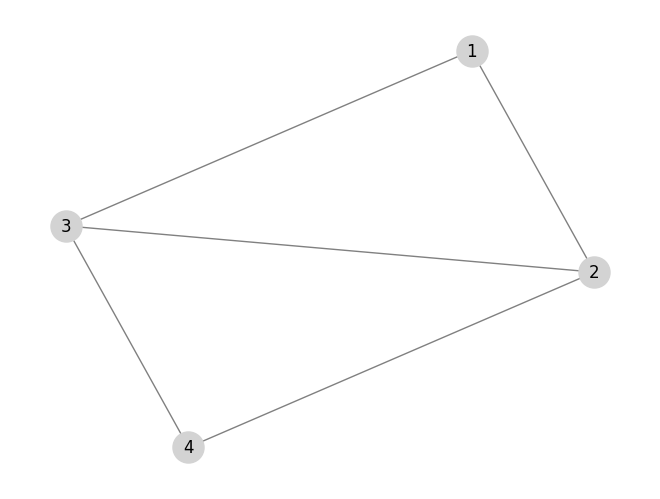

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
edges = [(1,2), (1,3), (2,3), (2,4), (3,4)]
graph.add_edges_from(edges)

nx.draw(graph, with_labels=True, node_color='lightgray', node_size=500, edge_color='gray')
plt.show()

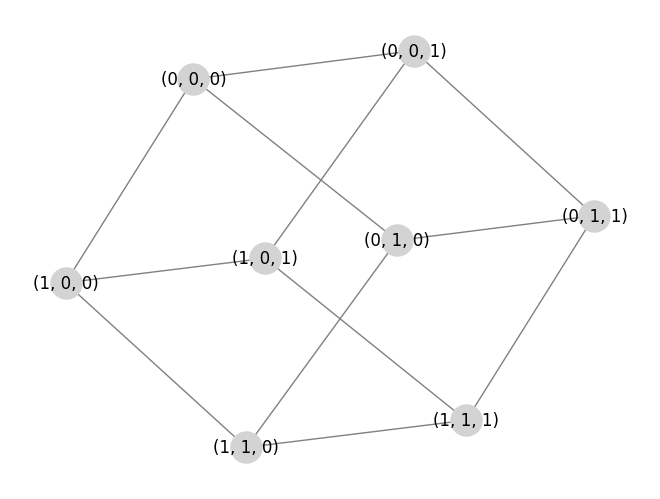

Базисные циклы [[(1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1)], [(0, 1, 0), (0, 0, 0), (1, 0, 0), (1, 1, 0)], [(1, 0, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0)], [(0, 1, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 1, 1)], [(0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 1, 1)]]


In [70]:
cube = nx.hypercube_graph(3)
basis_cycles = nx.cycle_basis(cube)

nx.draw(cube, with_labels=True, node_color='lightgray', node_size=500, edge_color='gray')
plt.show()

print('Базисные циклы', basis_cycles)

Циклы в ориентированном графе: [[1, 2, 3], [1, 2, 4, 3], [1, 2], [1, 3, 4, 2], [1, 3], [1, 3, 2], [2, 3, 4], [2, 3], [2, 4], [2, 4, 3], [3, 4]]


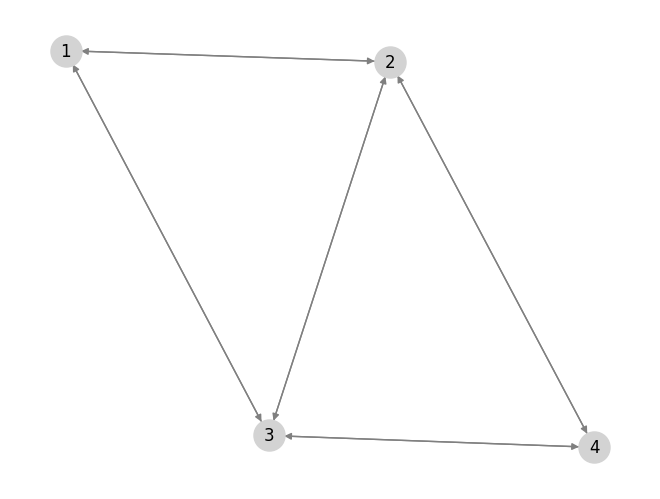

In [71]:
digraph = nx.DiGraph()
digraph.add_edges_from((u, v) for u, v in edges + [(v, u) for u, v in edges])
simple_cycles = list(nx.simple_cycles(digraph))

nx.draw(digraph, with_labels=True, node_color='lightgray', node_size=500, edge_color='gray')

print('Циклы в ориентированном графе:', simple_cycles)

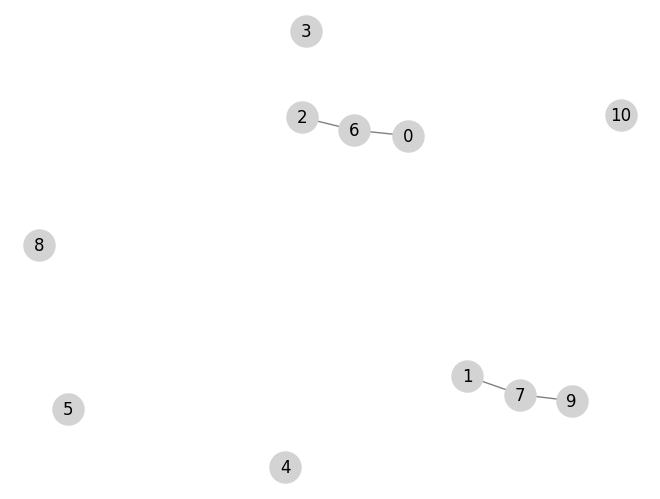

In [72]:
import random
r_graph = nx.Graph()
n = 10
p = 0.1
r_graph.add_nodes_from(list(range(1, n+1)))

for i in range(n):
    for j in range(i+1, n):
        if random.random() < p:
            r_graph.add_edge(i,j)

nx.draw(r_graph, with_labels=True, node_color='lightgray', node_size=500, edge_color='gray')
plt.show()

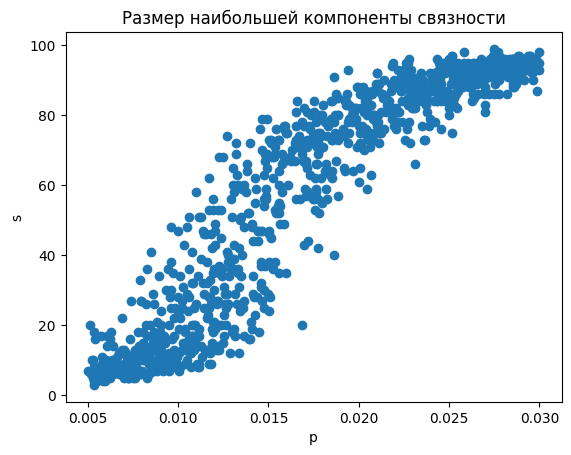

In [73]:
import numpy as np
n = 100
iters = 1000
p_vals = np.random.uniform(0.005, 0.03, iters)
biggest_components = []

for p in p_vals:
    graph = nx.erdos_renyi_graph(n, p)
    biggest_connected_component = max(len(c) for c in nx.connected_components(graph))
    biggest_components.append(biggest_connected_component)

plt.scatter(p_vals, biggest_components)
plt.title('Размер наибольшей компоненты связности')
plt.xlabel('p')
plt.ylabel('s')
plt.show()

In [74]:
import requests
import time
def get_friends_ids(user_id):
    friends_url = (f'http://api.vk.com/method/friends.get?user_id={user_id}'
                   f'&v=5.199&access_token={Здесь AccessToken}')
    json_response = requests.get(friends_url).json()
    if 'error' in json_response:
        print (f"Error")
        return []
    time.sleep(1)
    return json_response.get('response', {}).get('items', [])


In [75]:
def make_friends_graph(user_id):
    graph = {}
    friends_ids = get_friends_ids(user_id)
    for friend_id in friends_ids:
        print('Processing id:', friend_id)
        graph[friend_id] = get_friends_ids(friend_id)
    
    g = nx.Graph(directed=False)

    for i in graph:
        g.add_node(i)
        for j in graph[i]:
            if i != j and i in friends_ids and j in friends_ids:
                g.add_edge(i,j)

    nx.draw(g, with_labels=True, node_color='lightgray', node_size=500, edge_color='gray')
    plt.show()

Processing id: 16398903
Processing id: 17930696
Processing id: 26135882
Processing id: 38519998
Processing id: 45394580
Processing id: 67229500
Processing id: 70533446
Processing id: 72154353
Processing id: 85462993
Processing id: 86721665
Processing id: 89212198
Processing id: 95239549
Processing id: 102025685
Processing id: 113543308
Processing id: 118206677
Processing id: 122445159
Processing id: 131817644
Processing id: 135237040
Processing id: 136291027
Processing id: 136619391
Processing id: 139841589
Processing id: 140075350
Processing id: 144244332
Processing id: 146544365
Processing id: 148527068
Processing id: 150374562
Processing id: 153970113
Processing id: 154728215
Processing id: 156212706
Processing id: 156367247
Processing id: 157242062
Processing id: 159080861
Processing id: 159902896
Processing id: 160368582
Processing id: 161560667
Processing id: 165478932
Processing id: 169104461
Processing id: 171240263
Processing id: 173992568
Processing id: 175002646
Processing i

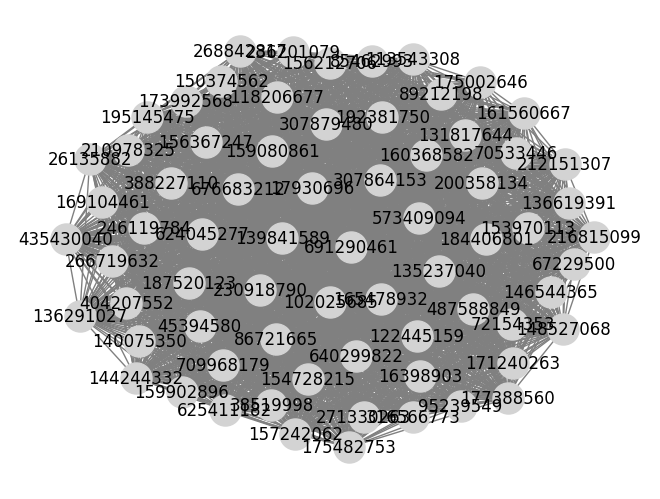

In [76]:
make_friends_graph(user_id=123596981)